### Actividad práctica

* Tomar una imagen
* Convertirla al espacio YIQ
* Manipularla
* Deconvertir
* Guardar

Llamando $\alpha$ al coeficiente de luminancia y $\beta$ al coeficiente de saturación.

1. normalizar los valores RGB
3. RGB -> YIQ (utilizando la matriz)
4. $Y'=\alpha Y$
5. $I'=\beta I ; Q'=\beta Q$
4. $\alpha$ <= 1
5. Chequear $Y' \le 1$
6. Chequear $-0.5957 \lt I' \lt 0.5957 ; -0.5226 \lt Q' \lt 0.5226$
7. Y'I'Q' -> R'G'B' (rgb normalizado)
8. Llevar de $[0,1]$ a $[0,255]$

#### Matriz de conversión

$
\begin{bmatrix}
R\\
G\\
B
\end{bmatrix} = 
\begin{bmatrix}
1 & 0.9663 & 0.6210 \\
1 & -0.2721 & -0.6474 \\
1 & -1.1070 & 1.7046
\end{bmatrix}
\begin{bmatrix}
Y\\
I\\
Q
\end{bmatrix}
$

$
\begin{bmatrix}
Y\\
I\\
Q
\end{bmatrix}=
\begin{bmatrix}
0.299 & 0.587 & 0.114 \\
0.595716 & -0.274453 & -0.321263 \\
0.211456 & -1.522591 & 0.311135
\end{bmatrix}
\begin{bmatrix}
R\\
G\\
B
\end{bmatrix}
$

In [1]:
import numpy as np
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Leemos imagen desde disco

yoda = np.array(Image.open('data/yoda.jpg'))

In [3]:
def apply_yiq_transformation(image, alpha=1, beta=1):
    """Applies a transformation to an image according to alpha and beta"""
  
    rgb_to_yiq = np.array([
        [0.299 , 0.587 , 0.114],
        [0.595716 , -0.274453 , -0.321263],
        [0.211456 , -0.522591 , 0.311135]
    ])
    
    
    yiq_to_rgb = np.array([
        [1, .9663, .6210],
        [1, -.2721, -.6474],
        [1, -1.1070, 1.7046]
    ])

    
    def transform_to_yiq(pixel):
        """Transform from RGB representation to YIQ representation"""
        return np.matmul(rgb_to_yiq, pixel)
    
    def transform_to_rgb(pixel):
        """Transform from YIQ representation to RGB representation"""
        return np.matmul(yiq_to_rgb, pixel)
    
    def apply_alpha_and_beta(pixel):
        """Applies alpha and beta values to a pixel
        
        Performs the operations needed for transformation.
        It also restricts the output values to those permited
        """
        y_prime, i_prime, q_prime = pixel


        y_prime *= alpha

        # Check Y'
        if y_prime > 1:
            y_prime = 1

        i_prime *= beta
        q_prime *= beta
        # Check I'
        if i_prime > .5957:
            i_prime = .5957

        if i_prime < -.5957:
            i_prime = -.5957

        # Check Q'
        if q_prime >.5226:
            q_prime = .5226

        if q_prime < -.5226:
            q_prime = -.5226
                
        return [y_prime, i_prime, q_prime]
    
    def normalize(image):
        return image/255
    
    def denormalize(normalized_image):
        denorm = (normalized_image*255).astype(int)
        # Clip limita los valores
        return np.clip(denorm, 0, 255)
    
    # Normalize the given image
    norm_img = normalize(image)
    
   
    # Convert to YIQ
    yiq_image = np.apply_along_axis(
        func1d=transform_to_yiq,
        axis=2,
        arr=norm_img
    )
    
    # Apply transformation
    yiq_prime_image = np.apply_along_axis(
        func1d=apply_alpha_and_beta
        ,axis=2,
        arr=yiq_image
    )
    
    # Deconvert to RGB
    rgb_prime_image = np.apply_along_axis(
        func1d=transform_to_rgb,
        axis=2,
        arr=yiq_prime_image
    )
    
    # Return denormalized image
    return denormalize(rgb_prime_image)
    

In [6]:
def compare_transformation(image, alpha, beta):
    manipulated_image = apply_yiq_transformation(image, alpha, beta)

    fig = plt.figure(figsize=(10,15))
    fig.add_subplot(1,2,1)
    plt.imshow(image)
    fig.add_subplot(1,2,2)
    plt.imshow(manipulated_image)
    plt.plot()

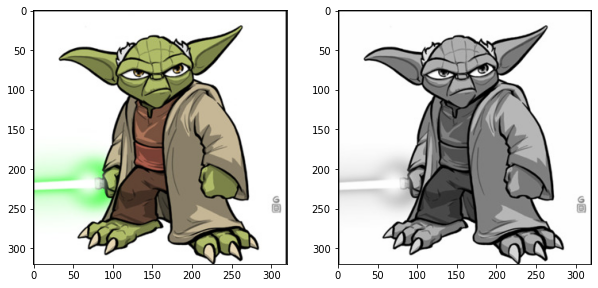

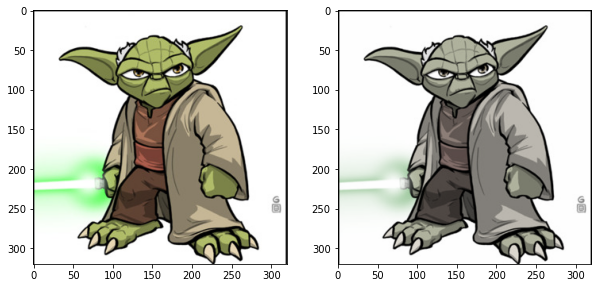

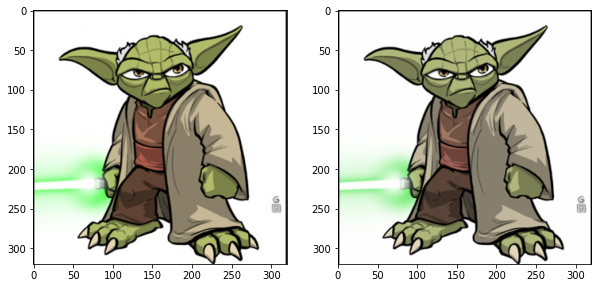

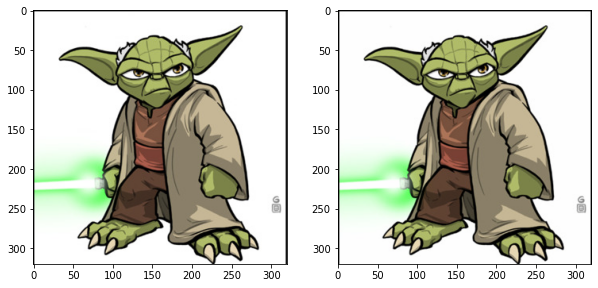

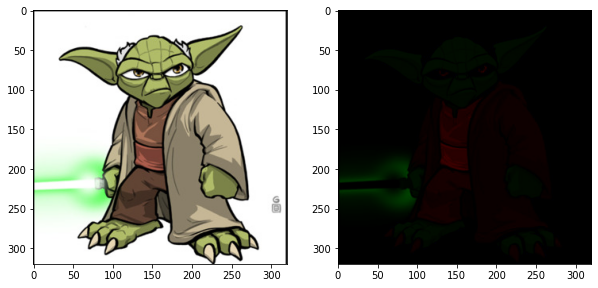

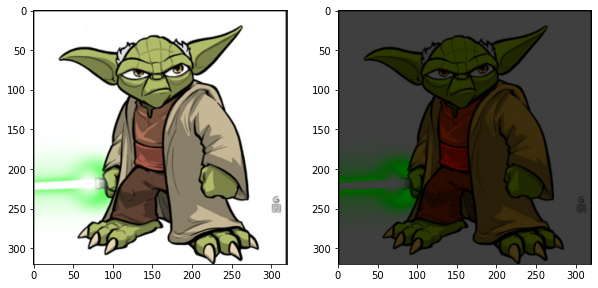

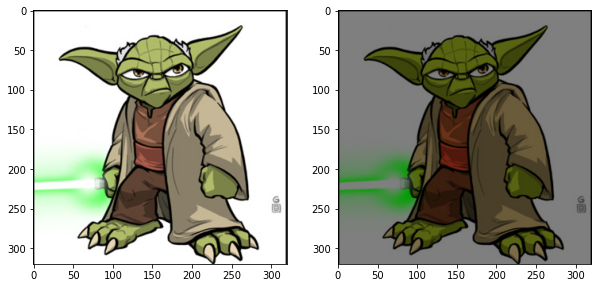

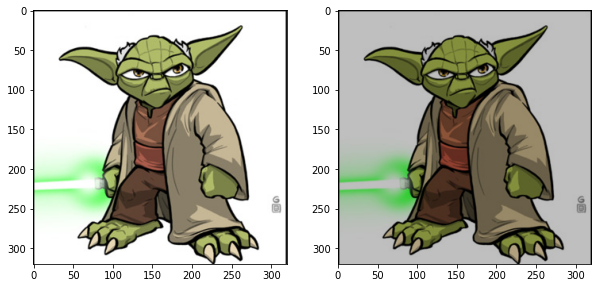

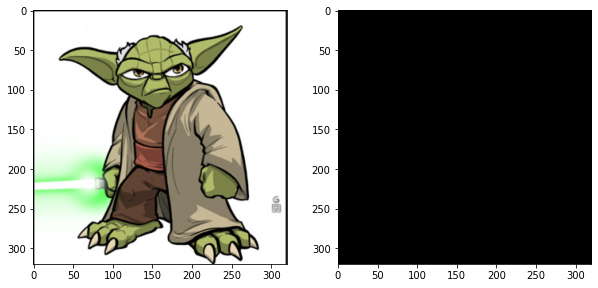

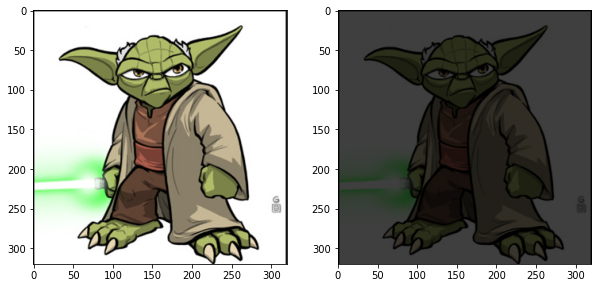

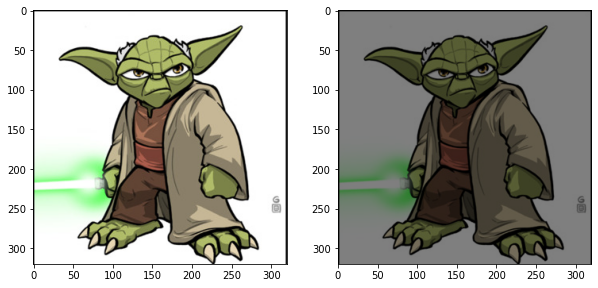

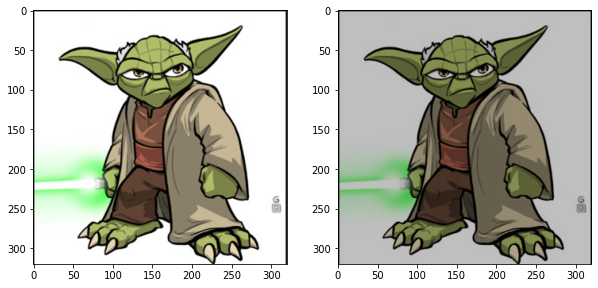

In [10]:
# Values to show the transformation
alphas_and_betas = [
    (1,0),
    (1,.25),
    (1,.75),
    (1,1),
    (0,1),
    (.25,1),
    (.5,1),
    (.75,1),
    (0,0),
    (.25,.25),
    (.5,.5),
    (.75,.75),
]

for alpha, beta in alphas_and_betas:
    compare_transformation(yoda, alpha=alpha, beta=beta)